In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

<function matplotlib.pyplot.show(close=None, block=None)>

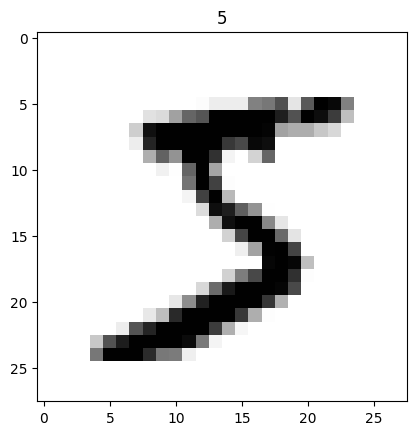

In [4]:
plt.imshow(X_train[0], cmap='binary')
plt.title(y_train[0])
plt.show

In [5]:
# normalizing images to range [0,1]
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

print(X_train.shape)

# converting the dimensions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

print(X_train.shape)

# conversion to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

(60000, 28, 28)
(60000, 28, 28, 1)


In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))

model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1, mode='max')
mc = ModelCheckpoint("D://okul//Bilkent//semester 302//bestmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callback = [es,mc]

In [9]:
# training

h = model.fit(X_train, y_train, epochs=5, validation_split=0.3, callbacks=callback)

Epoch 1/5
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8574 - loss: 0.4658
Epoch 1: val_accuracy improved from -inf to 0.97594, saving model to D://okul//Bilkent//semester 302//bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8577 - loss: 0.4649 - val_accuracy: 0.9759 - val_loss: 0.0758
Epoch 2/5
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9765 - loss: 0.0776
Epoch 2: val_accuracy improved from 0.97594 to 0.98200, saving model to D://okul//Bilkent//semester 302//bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9765 - loss: 0.0776 - val_accuracy: 0.9820 - val_loss: 0.0595
Epoch 3/5
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9834 - loss: 0.0548
Epoch 3: val_accuracy improved from 0.98200 to 0.98444, saving model to D://okul//Bilkent//semester 302//bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9834 - loss: 0.0548 - val_accuracy: 0.9844 - val_loss: 0.0509
Epoch 4/5
1301/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9870 - loss: 0.0448
Epoch 4: val_accuracy did not improve from 0.98444
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9870 - loss: 0.0448 - val_accuracy: 0.9844 - val_loss: 0.0494
Epoch 5/5
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9886 - loss: 0.0358
Epoch 5: val_accuracy improved from 0.98444 to 0.98694, saving model to D://okul//Bilkent//semester 302//bestmodel.h5


1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9886 - loss: 0.0358 - val_accuracy: 0.9869 - val_loss: 0.0424


In [10]:
model_S = keras.models.load_model("D://okul//Bilkent//semester 302//bestmodel.h5")

In [11]:
score = model_S.evaluate(X_test, y_test)
print(f"Accuracy: {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9853 - loss: 0.0429
Accuracy: 0.9887999892234802


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0     0.9929    0.9929    0.9929       980
           1     0.9930    0.9947    0.9938      1135
           2     0.9893    0.9884    0.9889      1032
           3     0.9930    0.9891    0.9911      1010
           4     0.9889    0.9969    0.9929       982
           5     0.9673    0.9955    0.9812       892
           6     0.9958    0.9843    0.9900       958
           7     0.9836    0.9922    0.9879      1028
           8     0.9907    0.9815    0.9861       974
           9     0.9919    0.9722    0.9820      1009

    accuracy                         0.9888     10000
   macro avg     0.9886    0.9888    0.9887     10000
weighted avg     0.9889    0.9888    0.9888     10000



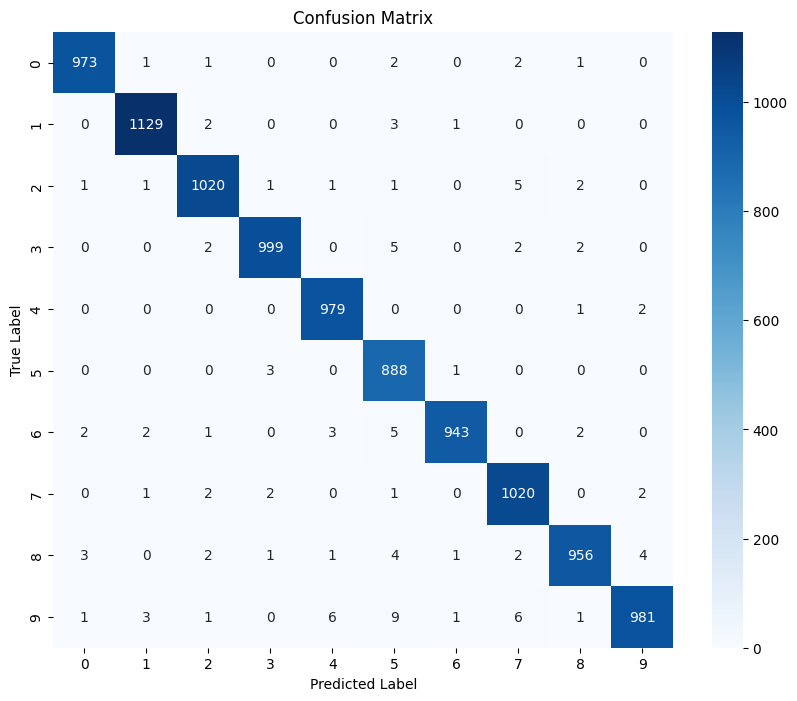

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model_S.predict(X_test)  # Returns probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels (0-9)
y_test_classes = np.argmax(y_test, axis=1)  # Convert one-hot y_test to class labels (0-9)

cm = confusion_matrix(y_test_classes, y_pred_classes)

report = classification_report(y_test_classes, y_pred_classes, digits=4)
print("Classification Report:\n", report)

# Step 4: Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()